In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import scipy.stats as stats
import scipy.special
#graphing
import matplotlib.pyplot as plt
#stats
import statsmodels.api as sm
from statsmodels.base.model import GenericLikelihoodModel

#import testing
import sys
sys.path.append("../")
import vuong_plots

In [2]:
class OLS_loglike(GenericLikelihoodModel):
    
    def __init__(self, *args,ols=False, **kwargs):
        super(OLS_loglike,self).__init__(*args,**kwargs)
        self.ols = ols

    def loglikeobs(self, params):
        y = self.endog
        x = self.exog
        mu_y = np.matmul(x,params)  
        resid = y - mu_y
        sigma = np.sqrt(np.sum(resid**2)/resid.shape[0])
        pr_y = stats.norm.logpdf( resid, loc=0,scale=sigma )
        return pr_y


def setup_shi(yn,xn,return_model=False,num_params=4):
    x1n,x2n = xn[:,0].reshape(xn.shape[0],1),xn[:,1:num_params]
    # model 1 grad, etc.
    model1 = sm.OLS(yn,sm.add_constant(x1n))
    model1_fit = model1.fit(disp=False)
    params1 = (model1_fit.params)
    
    model1_deriv = OLS_loglike(yn,sm.add_constant(x1n))
    ll1 = model1_deriv.loglikeobs(model1_fit.params)
    grad1 =  model1_deriv.score_obs(model1_fit.params)    
    hess1 = model1_deriv.hessian(model1_fit.params)
    
    #model 2 grad, etc.
    model2 = sm.OLS(yn,sm.add_constant(x2n))
    model2_fit = model2.fit(disp=False)
    params2 = (model2_fit.params)
    
    model2_deriv = OLS_loglike(yn,sm.add_constant(x2n))
    ll2 = model2_deriv.loglikeobs(model2_fit.params)
    grad2 =  model2_deriv.score_obs(model2_fit.params)    
    hess2 = model2_deriv.hessian(model2_fit.params)
    
    if return_model:
        return ll1,grad1,hess1,params1,model1,ll2,grad2,hess2,params2,model2
    return ll1,grad1,hess1,params1,ll2,grad2,hess2,params2

def gen_data(nobs=1000, a=0.0, num_params=1):
    x = np.random.normal(scale=1., size=(nobs,1+num_params))
    e = np.random.normal(loc=0.0, scale=1.0, size=nobs)
    y = 1 + a*x[:,0] + a/np.sqrt(num_params)*x[:,1:num_params+1].sum(axis=1) + e
    return y,x,nobs

yn,xn,nobs = gen_data()
ll1,grad1,hess1,params1,ll2,grad2,hess2,params2 = setup_shi(yn,xn,return_model=False,num_params=15)
print(grad1.shape,hess1.shape)

(1000, 2) (2, 2)


# a = 0

../figs/a0_k1.png


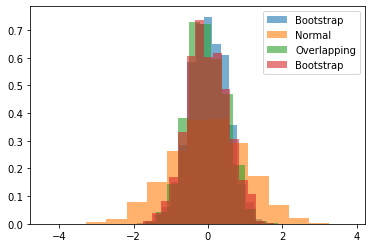

\begin{center}
\begin{tabular}{ccccccc}
\toprule
\textbf{Test} & \textbf{Mean} & \textbf{Var} & \textbf{K-Stat 3} & \textbf{K-Stat 4} & \textbf{Skew} & \textbf{Kurtosis} \\ \midrule
True & 0.005 & 0.255 & -0.014 & 0.003 & -0.014 & 0.197 \\
Bootstrap & -0.016 & 0.299 & 0.005 & -0.015 & 0.005 & 0.252 \\
Normal & 0.011 & 1.009 & -0.082 & -0.063 & -0.082 & 2.988 \\
Overlapping & -0.026 & 0.254 & 0.009 & -0.007 & 0.009 & 0.186 \\
\bottomrule
\end{tabular}
\end{center}


In [17]:
a = 0
k = 1
gen_data_ex = lambda : gen_data(nobs=1000,a=a,num_params=k)

vuong_plots.plot_kstats_table(gen_data_ex,setup_shi,figtitle='../figs/a%s_k%s.png'%(int(a*100),k))

../figs/a0_k9.png


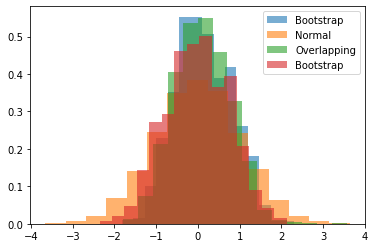

\begin{center}
\begin{tabular}{ccccccc}
\toprule
\textbf{Test} & \textbf{Mean} & \textbf{Var} & \textbf{K-Stat 3} & \textbf{K-Stat 4} & \textbf{Skew} & \textbf{Kurtosis} \\ \midrule
True & 0.145 & 0.454 & 0.035 & -0.091 & 0.035 & 0.524 \\
Bootstrap & -0.006 & 0.575 & -0.014 & -0.113 & -0.014 & 0.877 \\
Normal & -0.009 & 1.025 & 0.008 & -0.022 & 0.008 & 3.128 \\
Overlapping & 0.118 & 0.450 & 0.067 & 0.038 & 0.067 & 0.643 \\
\bottomrule
\end{tabular}
\end{center}


In [14]:
a = 0
k = 9
gen_data_ex = lambda : gen_data(nobs=1000,a=a,num_params=k)
vuong_plots.plot_kstats_table(gen_data_ex,setup_shi,figtitle='../figs/a%s_k%s.png'%(int(a*100),k))

../figs/a0_k4.png


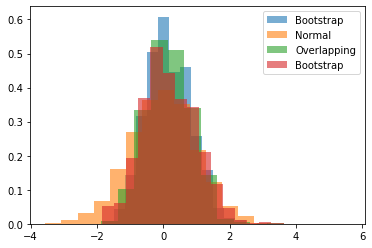

\begin{center}
\begin{tabular}{ccccccc}
\toprule
\textbf{Test} & \textbf{Mean} & \textbf{Var} & \textbf{K-Stat 3} & \textbf{K-Stat 4} & \textbf{Skew} & \textbf{Kurtosis} \\ \midrule
True & 0.162 & 0.467 & 0.090 & 0.044 & 0.090 & 0.694 \\
Bootstrap & 0.185 & 0.652 & 0.151 & 0.051 & 0.151 & 1.320 \\
Normal & -0.011 & 1.009 & -0.024 & 0.037 & -0.024 & 3.086 \\
Overlapping & 0.167 & 0.459 & 0.099 & 0.188 & 0.099 & 0.818 \\
\bottomrule
\end{tabular}
\end{center}


In [15]:
a = 0
k = 4
gen_data_ex = lambda : gen_data(nobs=1000,a=a,num_params=k)
vuong_plots.plot_kstats_table(gen_data_ex,setup_shi,figtitle='../figs/a%s_k%s.png'%(int(a*100),k))

../figs/a0_k19.png


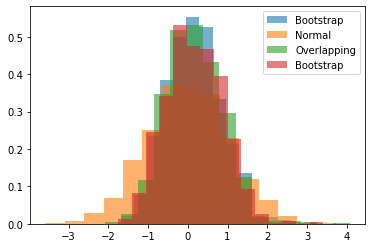

\begin{center}
\begin{tabular}{ccccccc}
\toprule
\textbf{Test} & \textbf{Mean} & \textbf{Var} & \textbf{K-Stat 3} & \textbf{K-Stat 4} & \textbf{Skew} & \textbf{Kurtosis} \\ \midrule
True & 0.166 & 0.498 & 0.125 & 0.090 & 0.124 & 0.830 \\
Bootstrap & 0.174 & 0.518 & 0.098 & 0.067 & 0.098 & 0.868 \\
Normal & -0.000 & 1.043 & 0.019 & -0.022 & 0.019 & 3.241 \\
Overlapping & 0.156 & 0.477 & 0.104 & 0.100 & 0.104 & 0.781 \\
\bottomrule
\end{tabular}
\end{center}


In [16]:
a = 0
k = 19
gen_data_ex = lambda : gen_data(nobs=1000,a=a,num_params=k)

vuong_plots.plot_kstats_table(gen_data_ex,setup_shi,figtitle='../figs/a%s_k%s.png'%(int(a*100),k))

# a = .25

../figs/a25_k1.png


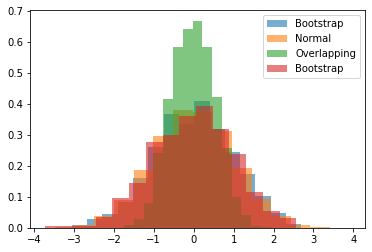

\begin{center}
\begin{tabular}{ccccccc}
\toprule
\textbf{Test} & \textbf{Mean} & \textbf{Var} & \textbf{K-Stat 3} & \textbf{K-Stat 4} & \textbf{Skew} & \textbf{Kurtosis} \\ \midrule
True & 0.001 & 1.005 & -0.095 & -0.224 & -0.095 & 2.798 \\
Bootstrap & -0.029 & 1.023 & -0.156 & -0.147 & -0.156 & 2.980 \\
Normal & -0.011 & 1.010 & -0.022 & -0.065 & -0.022 & 2.993 \\
Overlapping & -0.014 & 0.302 & 0.002 & -0.030 & 0.002 & 0.244 \\
\bottomrule
\end{tabular}
\end{center}


In [8]:
a=.25
k = 1
gen_data_ex = lambda : gen_data(nobs=1000,a=a,num_params=k)

vuong_plots.plot_kstats_table(gen_data_ex,setup_shi,figtitle='../figs/a%s_k%s.png'%(int(a*100),k))

../figs/a25_k9.png


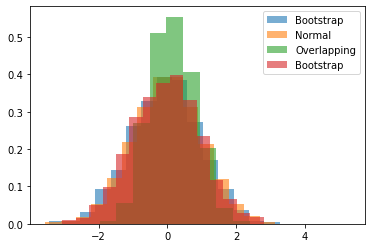

\begin{center}
\begin{tabular}{ccccccc}
\toprule
\textbf{Test} & \textbf{Mean} & \textbf{Var} & \textbf{K-Stat 3} & \textbf{K-Stat 4} & \textbf{Skew} & \textbf{Kurtosis} \\ \midrule
True & -0.054 & 0.994 & -0.048 & 0.020 & -0.048 & 2.974 \\
Bootstrap & -0.041 & 0.964 & -0.014 & -0.085 & -0.014 & 2.692 \\
Normal & 0.009 & 0.977 & -0.046 & -0.034 & -0.046 & 2.830 \\
Overlapping & 0.153 & 0.436 & 0.064 & 0.095 & 0.064 & 0.664 \\
\bottomrule
\end{tabular}
\end{center}


In [9]:
a=.25
k = 9
gen_data_ex = lambda : gen_data(nobs=1000,a=a,num_params=k)

vuong_plots.plot_kstats_table(gen_data_ex,setup_shi,figtitle='../figs/a%s_k%s.png'%(int(a*100),k))

../figs/a25_k4.png


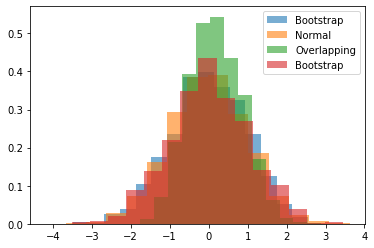

\begin{center}
\begin{tabular}{ccccccc}
\toprule
\textbf{Test} & \textbf{Mean} & \textbf{Var} & \textbf{K-Stat 3} & \textbf{K-Stat 4} & \textbf{Skew} & \textbf{Kurtosis} \\ \midrule
True & -0.007 & 0.944 & -0.172 & -0.090 & -0.172 & 2.571 \\
Bootstrap & 0.011 & 1.031 & -0.036 & 0.037 & -0.036 & 3.214 \\
Normal & -0.014 & 0.979 & 0.002 & 0.070 & 0.002 & 2.940 \\
Overlapping & 0.167 & 0.470 & 0.066 & -0.020 & 0.066 & 0.644 \\
\bottomrule
\end{tabular}
\end{center}


In [10]:
a=.25
k = 4
gen_data_ex = lambda : gen_data(nobs=1000,a=a,num_params=k)

vuong_plots.plot_kstats_table(gen_data_ex,setup_shi,figtitle='../figs/a%s_k%s.png'%(int(a*100),k))

../figs/a25_k19.png


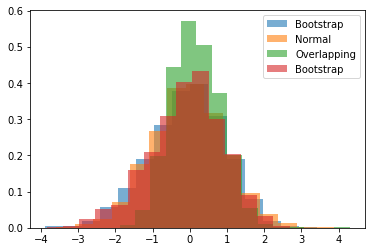

\begin{center}
\begin{tabular}{ccccccc}
\toprule
\textbf{Test} & \textbf{Mean} & \textbf{Var} & \textbf{K-Stat 3} & \textbf{K-Stat 4} & \textbf{Skew} & \textbf{Kurtosis} \\ \midrule
True & -0.080 & 1.039 & -0.313 & 0.267 & -0.312 & 3.490 \\
Bootstrap & -0.095 & 0.983 & -0.363 & 0.122 & -0.362 & 3.008 \\
Normal & -0.020 & 0.984 & 0.034 & 0.089 & 0.034 & 2.989 \\
Overlapping & 0.162 & 0.441 & 0.081 & 0.060 & 0.080 & 0.642 \\
\bottomrule
\end{tabular}
\end{center}


In [11]:
a= .25
k = 19
gen_data_ex = lambda : gen_data(nobs=1000,a=a,num_params=k)

vuong_plots.plot_kstats_table(gen_data_ex,setup_shi,figtitle='../figs/a%s_k%s.png'%(int(a*100),k))